In [47]:
import numpy as np
import pandas as pd
import glob
import os
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt




In [61]:
df = pd.read_csv(r"C:\Users\mattl\OneDrive\Documents\reibrowser\Database\Redfin Data\rentals.csv")

# single_family_home_rentals = all_rentals[(all_rentals["Property Type"] == 6) & (all_rentals["Max Beds"] < 5) & (all_rentals["State"]).isin(["WA", "OR"])]

df = df[(df["Max Beds"] > 0 ) 
        & (df["Max Beds"] < 6)  
        & (df["Max Baths"] < 4)  
        & (df["Max Square Feet"] < 5000)  
        & (df["Max Rent Price"] < 10000)  
        & (df["State"].notna()) 
        & (df["State"]).isin(["TX"])]

# df = df[~df['Address'].str.contains('Unit', case=False, na=False) & 
#         ~df['Address'].str.contains('Apt', case=False, na=False)]

single_family_home_rentals = df


## First Use KNN to get an average rent price for the 10 nearest houses with the same number of bedrooms

In [62]:

knn_features = ["Latitude", "Longitude"]

target = "Max Rent Price"

single_family_home_rentals['KNN_Rent_Value'] = np.nan

for beds in range(1, 5, 1):
    print(beds)
    knn_df = single_family_home_rentals.dropna(subset=knn_features + [target])
    knn_df = knn_df[knn_df["Max Beds"] == beds]
    print("Houses Analyzed", len(knn_df))
    
    if len(knn_df) > 1:
        X = knn_df[knn_features]
        y = knn_df[target]

        # Split data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize KNN Regressor
        knn_regressor = KNeighborsRegressor(n_neighbors=5, metric='haversine')

        # Fit the model
        knn_regressor.fit(X_train, y_train)

        # Predict on the training set to get KNN rent values
        y_knn = knn_regressor.predict(X)

        # Append the KNN rent values to the DataFrame
        single_family_home_rentals.loc[knn_df.index, 'KNN_Rent_Value'] = y_knn

        # Predict on the test set for evaluation
        y_pred = knn_regressor.predict(X_test)

        # Evaluate the model
        mse = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"Mean Absolute Error: {mse}")
        print(f"Rsquared: {r2}")

display(single_family_home_rentals)

1
Houses Analyzed 4241
Mean Absolute Error: 235.7542991755006
Rsquared: 0.3794575717881341
2
Houses Analyzed 5442
Mean Absolute Error: 373.877318640955
Rsquared: 0.4153639865887705
3
Houses Analyzed 10211
Mean Absolute Error: 390.67459618208517
Rsquared: 0.4432106947000004
4
Houses Analyzed 4994
Mean Absolute Error: 497.0284284284284
Rsquared: 0.2604435768347332


,Property ID,URL,Property Type,Address,City,State,ZIP Code,Country Code,Latitude,Longitude,...,Max Square Feet,Max Rent Price,Description,cbg_geoid,cbsa_geoid,cbsa_name,state_id,State_Code,updated_date,KNN_Rent_Value
26616,191492497,/TX/Austin/5702-Spoke-Ct-78744/unit-B/apartmen...,5,5702 Spoke Ct Unit B,Austin,TX,78744.0,1,30.194298,-97.755700,...,1007.0,1495.0,"This 2-bedroom, 2-bathroom house is located in...",4.845300e+11,12420.0,"Austin-Round Rock-Georgetown, TX",44.0,TX,2024-07-04,1448.6
26617,109905220,/TX/Austin/7204-Ondantra-Bnd-78744/home/109905220,6,7204 Ondantra Bnd,Austin,TX,78744.0,1,30.162107,-97.729865,...,2469.0,2850.0,"For lease is a large 4 bedroom, 2.5 bath house...",4.845300e+11,12420.0,"Austin-Round Rock-Georgetown, TX",44.0,TX,2024-07-04,2605.0
26619,31192985,/TX/Austin/7821-Duber-Ln-78747/home/31192985,6,7821 Duber Ln,Austin,TX,78747.0,1,30.159050,-97.749994,...,1426.0,2050.0,Beautiful and charming one-story home in a qui...,4.845300e+11,12420.0,"Austin-Round Rock-Georgetown, TX",44.0,TX,2024-07-04,2571.0
26620,109913520,/TX/Austin/7400-Branrust-Dr-78744/home/109913520,6,7400 Branrust Dr,Austin,TX,78744.0,1,30.169504,-97.726160,...,2494.0,2850.0,"This 2 story home has an open floor plan, high...",4.845300e+11,12420.0,"Austin-Round Rock-Georgetown, TX",44.0,TX,2024-07-04,2605.0
26621,31653241,/TX/Austin/5007-Cape-Verde-Cv-78744/home/31653241,4,5007 Cape Verde Cv,Austin,TX,78744.0,1,30.192892,-97.740259,...,900.0,1600.0,Affordable and tastefully updated single story...,4.845300e+11,12420.0,"Austin-Round Rock-Georgetown, TX",44.0,TX,2024-07-04,1428.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55387,109658664,/TX/Boerne/128-Destiny-78006/home/109658664,6,128 Destiny,Boerne,TX,78006.0,1,29.796085,-98.703871,...,1600.0,2550.0,Gorgeous single one-story home with 4 bedrooms...,4.825997e+11,41700.0,"San Antonio-New Braunfels, TX",44.0,TX,2024-07-04,2930.0
55388,48788695,/TX/Boerne/10046-Saxet-Dr-78006/home/48788695,6,10046 Saxet Dr,Boerne,TX,78006.0,1,29.716440,-98.689695,...,2771.0,3950.0,Make yourself right at home with this fully fu...,4.802918e+11,41700.0,"San Antonio-New Braunfels, TX",44.0,TX,2024-07-04,2382.0
55389,48507033,/TX/Boerne/140-Dusty-Corral-78006/home/48507033,6,140 Dusty Corral,Boerne,TX,78006.0,1,29.783848,-98.693886,...,2824.0,2500.0,Great home near schools and neighborhood ameni...,4.825997e+11,41700.0,"San Antonio-New Braunfels, TX",44.0,TX,2024-07-04,2408.0
55390,188720704,/TX/Boerne/10616-Yellowtail-Blvd-78006/home/18...,6,10616 Yellowtail Blvd,Boerne,TX,78006.0,1,29.731282,-98.698187,...,2100.0,3100.0,"Never lived in, Beautiful, Brand new Meritage ...",4.802918e+11,41700.0,"San Antonio-New Braunfels, TX",44.0,TX,2024-07-04,1925.8


# Regression using Nearest Neighbor Rental value is effective

Max Beds           0.514912
Max Baths          0.593882
Max Square Feet    0.647775
KNN_Rent_Value     0.812815
dtype: float64


<Axes: >

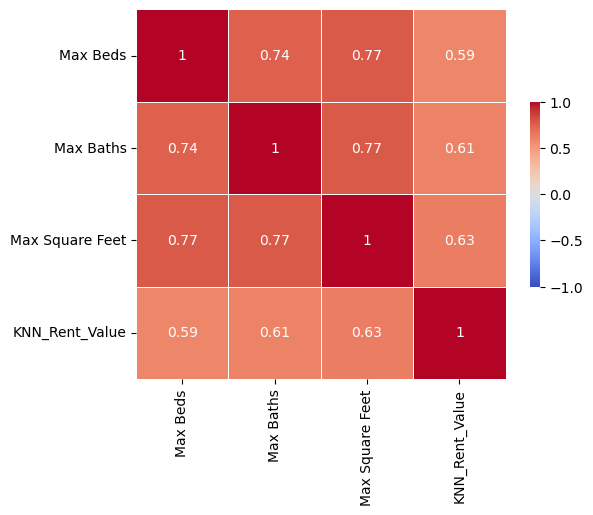

In [63]:
#Check Feature Correlation
regression_features = ["Max Beds", "Max Baths", "Max Square Feet", "KNN_Rent_Value"]
target = "Max Rent Price"

corr = single_family_home_rentals[regression_features].corrwith(single_family_home_rentals[target])

print(corr)

correlation_matrix = single_family_home_rentals[regression_features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [64]:
linear_reg_df = single_family_home_rentals.dropna(subset=regression_features + [target])

print(len(single_family_home_rentals) - len(linear_reg_df)," Out of ", len(single_family_home_rentals), " Houses removed for data quality")

X = linear_reg_df[regression_features]
y = linear_reg_df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.22, random_state= 69)

y_pred = LinearRegression().fit(X_train, y_train).predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error ", mae)
print("Rsquared Value ",r2)

598  Out of  25486  Houses removed for data quality
Mean Absolute Error  287.1455841045777
Rsquared Value  0.7303474471266704


## Now incorporate Demographics Information

In [65]:
median_income = pd.read_csv(r"C:\Users\mattl\OneDrive\Documents\reibrowser\Database\Rent Training Data\ACSDT5Y2022.B19013-Data.csv", skiprows=[1], na_values='-')

median_income['GEO_ID'] = median_income['GEO_ID'].astype(str)

# Extracting everything after "US" and storing it in a new column 'cbg_geoid'
median_income['cbg_geoid'] = median_income['GEO_ID'].str.extract('US(\d+)')

median_income['median_income'] = median_income['B19013_001E'].str.replace(',','+').str.replace('+','').str.replace('-','').astype(float)

median_income = median_income[["cbg_geoid", "median_income"]]

epa_cbg_demo = pd.read_csv(r"C:\Users\mattl\OneDrive\Documents\reibrowser\Database\Rent Training Data\EPA_SmartLocationDatabase_V3_Jan_2021_Final (1).csv")

epa_cbg_demo["cbg_geoid"] = \
    epa_cbg_demo["STATEFP"].astype(str).str.zfill(2)  \
    + epa_cbg_demo["COUNTYFP"].astype(str).str.zfill(3) \
    + epa_cbg_demo["TRACTCE"].astype(str).str.zfill(6) \
    + epa_cbg_demo["BLKGRPCE"].astype(str)


cbg_demographics = epa_cbg_demo.merge(median_income, on='cbg_geoid', how="inner")

In [66]:
single_family_home_rentals["cbg_geoid"] = single_family_home_rentals["cbg_geoid"].astype(float)
cbg_demographics["cbg_geoid"] = cbg_demographics["cbg_geoid"].astype(float)

demo_corr_test_df = pd.merge(single_family_home_rentals, cbg_demographics, on='cbg_geoid', how='inner', suffixes=('_rental', '_demo'))


## Check for Correlation

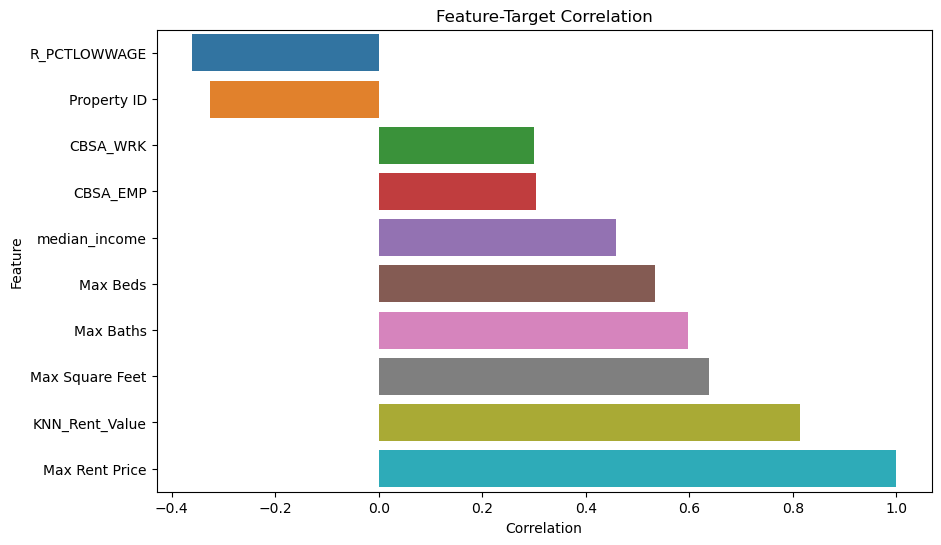

In [67]:

demo_basic_features = demo_corr_test_df.select_dtypes(include = ["number"]).columns
target = "Max Rent Price"

feature_target_correlation = pd.DataFrame({
    "feature": demo_basic_features,
    "correlation": demo_corr_test_df[demo_basic_features].corrwith(demo_corr_test_df[target])
})



# Reset index to turn the index into a column
feature_target_correlation.reset_index(drop=True, inplace=True)

correlation_to_plot = feature_target_correlation[abs(feature_target_correlation["correlation"]) > .3 ]

# Create the bar chart using Seaborn
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.barplot(x="correlation", y="feature", data=correlation_to_plot.sort_values("correlation"))

# Add titles and labels
plt.title('Feature-Target Correlation')
plt.xlabel('Correlation')
plt.ylabel('Feature')

# Display the plot

plt.show()

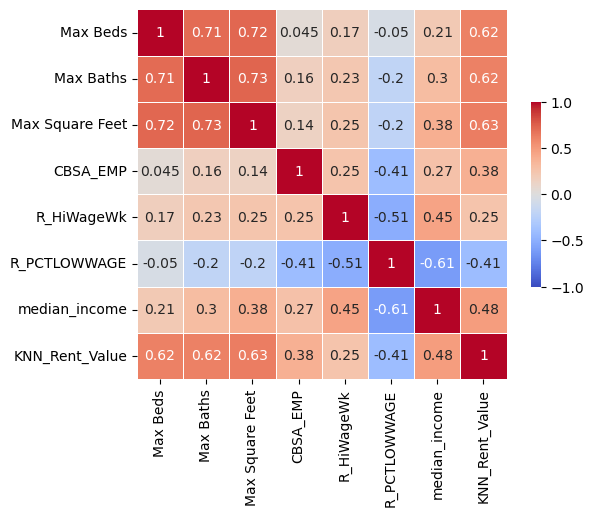

In [68]:
features = [
 'Max Beds',
 'Max Baths',
 'Max Square Feet',
#  'CBSA_POP',
 'CBSA_EMP',
#  'CBSA_WRK',
 'R_HiWageWk',
 'R_PCTLOWWAGE',
 'median_income',
 'KNN_Rent_Value'
]

demo_regression_df = demo_corr_test_df[features + [target]]

sns.heatmap(demo_regression_df[features].corr(), annot=True, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [69]:
regression_metadata = demo_corr_test_df.dropna(subset=features + [target])

print(len(demo_regression_df) - len(regression_metadata), " out of ", len(demo_regression_df), " houses removed for data quality")

# Define features and target
X = regression_metadata[features]
y = regression_metadata[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=69)

# Initialize and train the regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predict on the test set
y_test_pred = linear_regressor.predict(X_test)
# Predict on the training set
y_train_pred = linear_regressor.predict(X_train)

# Combine the training and test sets
X_combined = pd.concat([X_train, X_test])
y_combined_pred = np.concatenate([y_train_pred, y_test_pred])
train_flag_combined = np.concatenate([np.ones(len(X_train)), np.zeros(len(X_test))])

# Add the predictions and flags back to the DataFrame
regression_metadata.loc[X_combined.index, 'Predicted_Rent'] = y_combined_pred
regression_metadata.loc[X_combined.index, 'Used_in_Training'] = train_flag_combined

final_df = regression_metadata[["Property ID", "Address"] + features + ["Predicted_Rent", "Used_in_Training"] + [target]]

# Merge the results back to the original dataset

# Evaluate the model
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Mean Absolute Error:", mae)
print("R-squared Value:", r2)


display(final_df[final_df["Used_in_Training"] == 0])

562  out of  10294  houses removed for data quality
Mean Absolute Error: 297.324242143095
R-squared Value: 0.7130224868339161


C:\Users\mattl\AppData\Local\Temp\ipykernel_12732\1231938551.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_metadata.loc[X_combined.index, 'Predicted_Rent'] = y_combined_pred
C:\Users\mattl\AppData\Local\Temp\ipykernel_12732\1231938551.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_metadata.loc[X_combined.index, 'Used_in_Training'] = train_flag_combined


,Property ID,Address,Max Beds,Max Baths,Max Square Feet,CBSA_EMP,R_HiWageWk,R_PCTLOWWAGE,median_income,KNN_Rent_Value,Predicted_Rent,Used_in_Training,Max Rent Price
0,191492497,5702 Spoke Ct Unit B,2,2.0,1007.0,1004341,259,0.253254,72569.0,1448.6,1516.097175,0.0,1495.0
12,32129653,3925 Vitruvian Way,3,2.5,1218.0,3545715,72,0.209790,47045.0,2448.4,2325.067228,0.0,1999.0
18,177448969,4016 Belt Line Rd,1,1.0,685.0,3545715,696,0.175561,111063.0,1306.8,1279.404334,0.0,940.0
24,31195634,14588 Poe Ct,3,2.5,2202.0,3545715,233,0.135870,113017.0,3107.0,3340.233131,0.0,3000.0
30,170488461,1328 Mistywood Ln,3,2.0,1528.0,3545715,1202,0.188494,86007.0,2528.0,2353.241609,0.0,2395.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10270,183866434,8311 NE Zac Lentz Pkwy,2,2.0,1110.0,37681,191,0.167539,107670.0,1158.6,1417.604297,0.0,1392.0
10275,188583979,120 Haviland St Unit 2,3,2.0,3168.0,9260,265,0.214545,42574.0,1085.4,1861.133681,0.0,1000.0
10276,186248893,1708 Holloman Dr Unit 5,1,1.0,278.0,9260,174,0.237179,65726.0,841.8,718.507724,0.0,700.0
10286,48509780,400 Rosewood Ave,2,1.0,755.0,979988,301,0.204545,48304.0,1418.8,1164.514280,0.0,1275.0


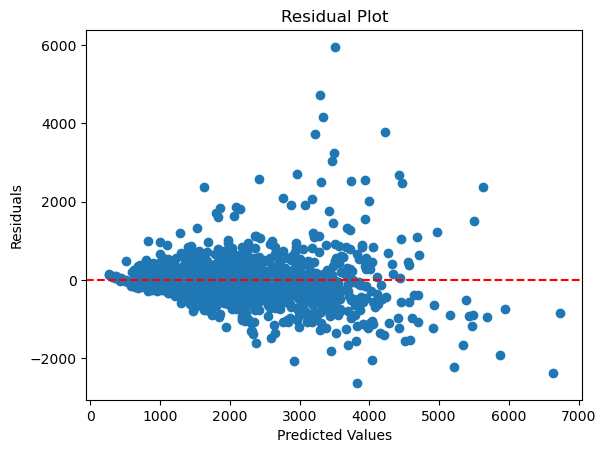

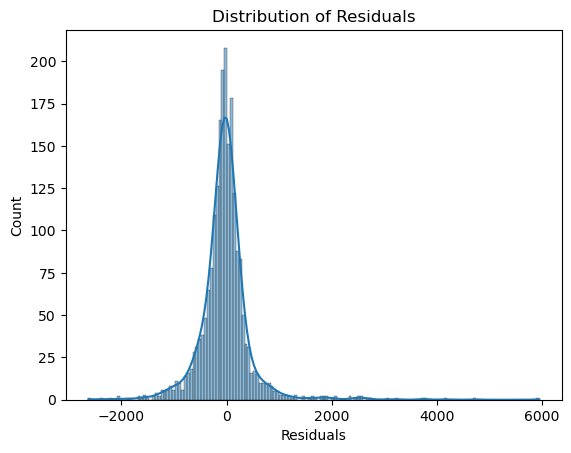

           Feature  Coefficient
0         Max Beds  -173.788426
1        Max Baths   211.355052
2  Max Square Feet     0.386547
3         CBSA_EMP    -0.000002
4       R_HiWageWk    -0.100895
5     R_PCTLOWWAGE  -408.410041
6    median_income     0.001429
7   KNN_Rent_Value     0.799502


In [70]:

residuals = y_test - y_test_pred

# Plot residuals
plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_regressor.coef_
})

print(feature_importance)

## Having APT or UNIT in Address does not have an statistically signifficant impact on Error 

                               sum_sq      df         F    PR(>F)
C(Contains_APT_or_Unit)  7.627619e+05     1.0  2.450448  0.117524
Residual                 3.028701e+09  9730.0       NaN       NaN


C:\Users\mattl\AppData\Local\Temp\ipykernel_12732\3771950277.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['Contains_APT_or_Unit'] = val_df['Address'].str.contains('Unit', case=False, na=False) | val_df['Address'].str.contains('Apt', case=False, na=False)
C:\Users\mattl\AppData\Local\Temp\ipykernel_12732\3771950277.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df["error"] = val_df["Predicted_Rent"] - val_df["Max Rent Price"]


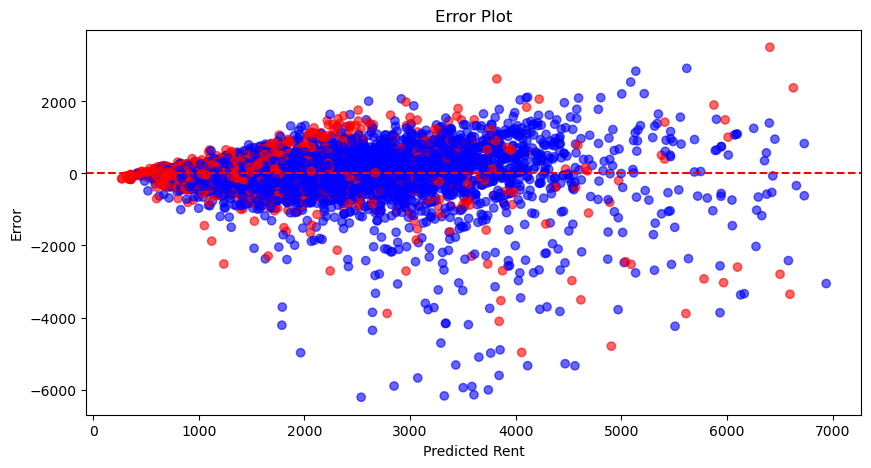

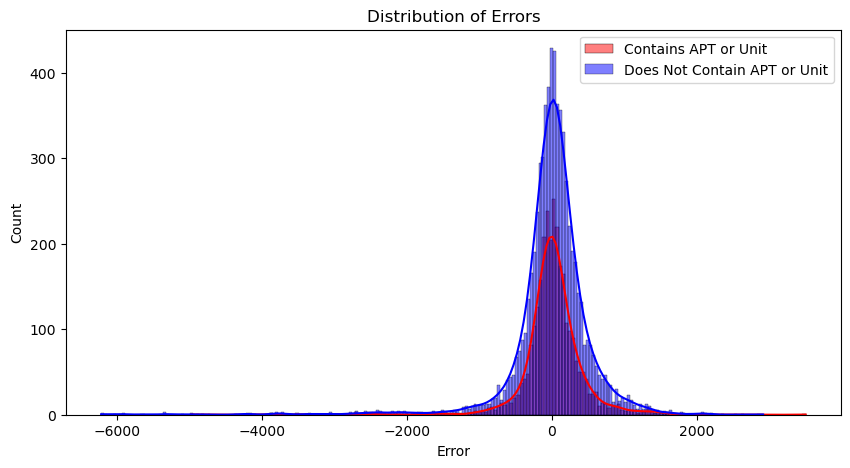

Summary statistics for errors with 'APT' or 'Unit' in the address:
count    2966.000000
mean       19.760898
std       469.510861
min     -4967.605161
25%      -138.583746
50%        17.177950
75%       183.696928
max      3505.367227
Name: error, dtype: float64

Summary statistics for errors without 'APT' or 'Unit' in the address:
count    6766.000000
mean        0.528033
std       592.524856
min     -6213.359649
25%      -159.752244
50%        30.529167
75%       227.418961
max      2918.652128
Name: error, dtype: float64


In [71]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Does Having APT or Unit affect my error

val_df = final_df

val_df['Contains_APT_or_Unit'] = val_df['Address'].str.contains('Unit', case=False, na=False) | val_df['Address'].str.contains('Apt', case=False, na=False)

val_df["error"] = val_df["Predicted_Rent"] - val_df["Max Rent Price"]

anova_model = ols('error ~ C(Contains_APT_or_Unit)', data=val_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)


print(anova_table)

# Plot residuals (errors)
plt.figure(figsize=(10, 5))
plt.scatter(val_df['Predicted_Rent'], val_df['error'], c=val_df['Contains_APT_or_Unit'].apply(lambda x: 'red' if x else 'blue'), alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Rent')
plt.ylabel('Error')
plt.title('Error Plot')
plt.show()

# Plot distribution of errors
plt.figure(figsize=(10, 5))
sns.histplot(val_df[val_df['Contains_APT_or_Unit']]['error'], kde=True, color='red', label='Contains APT or Unit')
sns.histplot(val_df[~val_df['Contains_APT_or_Unit']]['error'], kde=True, color='blue', label='Does Not Contain APT or Unit')
plt.xlabel('Error')
plt.title('Distribution of Errors')
plt.legend()
plt.show()

# Print summary statistics
print("Summary statistics for errors with 'APT' or 'Unit' in the address:")
print(val_df[val_df['Contains_APT_or_Unit']]['error'].describe())

print("\nSummary statistics for errors without 'APT' or 'Unit' in the address:")
print(val_df[~val_df['Contains_APT_or_Unit']]['error'].describe())
